In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('exams1.csv')
df.head()

,gender,race/ethnicity,math score,reading score,writing score
0,male,group A,67,67,63
1,female,group D,40,59,55
2,male,group E,59,60,50
3,male,group B,77,78,68
4,male,group E,78,73,68


In [3]:
print("Missing values : \n", df.isnull().sum())

Missing values : 
 gender            0
race/ethnicity    0
math score        0
reading score     0
writing score     0
dtype: int64


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for negative or unrealistic values in numeric columns
print("\nInvalid score checks:")
print(df[(df['math score'] < 0) | (df['math score'] > 100)])
print(df[(df['reading score'] < 0) | (df['reading score'] > 100)])
print(df[(df['writing score'] < 0) | (df['writing score'] > 100)])


Missing values:
 gender            0
race/ethnicity    0
math score        0
reading score     0
writing score     0
dtype: int64

Invalid score checks:
Empty DataFrame
Columns: [gender, race/ethnicity, math score, reading score, writing score]
Index: []
Empty DataFrame
Columns: [gender, race/ethnicity, math score, reading score, writing score]
Index: []
Empty DataFrame
Columns: [gender, race/ethnicity, math score, reading score, writing score]
Index: []


In [6]:
# Fill numeric missing values with median (if needed)
df['math score'].fillna(df['math score'].median(), inplace=True)
df['reading score'].fillna(df['reading score'].median(), inplace=True)
df['writing score'].fillna(df['writing score'].median(), inplace=True)


C:\Users\Sudarshan Ahire\AppData\Local\Temp\ipykernel_13080\3811184474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].median(), inplace=True)
C:\Users\Sudarshan Ahire\AppData\Local\Temp\ipykernel_13080\3811184474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.5)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'math score')
df = remove_outliers_iqr(df, 'reading score')
df = remove_outliers_iqr(df, 'writing score')

In [9]:
# Check skewness before
print("Skewness before:", df['math score'].skew())

# Apply log transformation
df['log_math_score'] = np.log(df['math score'] + 1)  # +1 to avoid log(0)

# Check skewness after
print("Skewness after:", df['log_math_score'].skew())


Skewness before: -0.03575641039794264
Skewness after: -0.2948435494174891


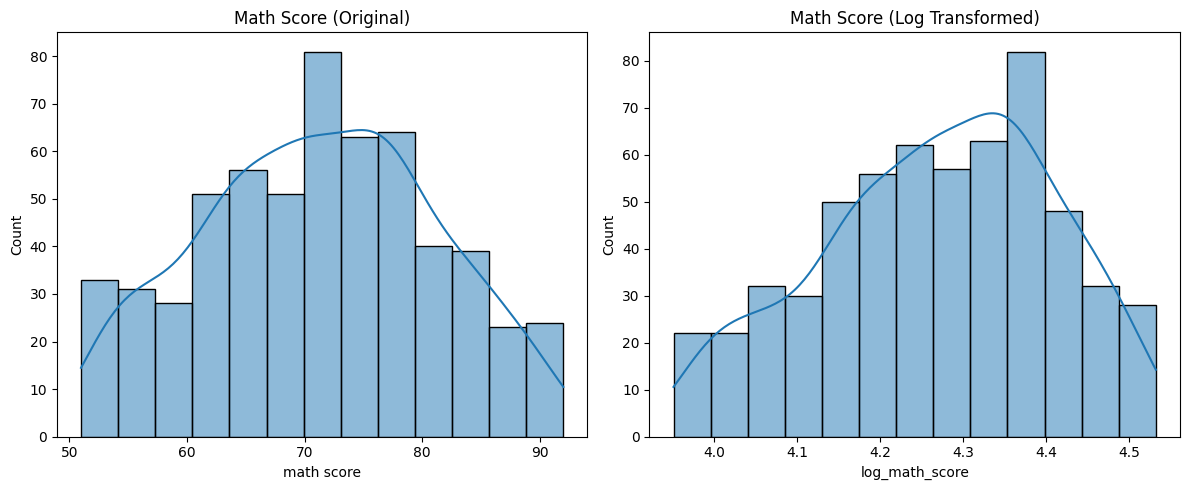

In [10]:
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df['math score'], kde=True)
plt.title("Math Score (Original)")

# Transformed
plt.subplot(1, 2, 2)
sns.histplot(df['log_math_score'], kde=True)
plt.title("Math Score (Log Transformed)")

plt.tight_layout()
plt.show()
